<a href="https://colab.research.google.com/github/TreeLiquid/Intro-to-ML/blob/main/4105_HW2_Shigapov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pre-Processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Obtain file data
filepath = '/content/drive/My Drive/Fall-2023/Intro-to-ML/Datasets/Housing.csv'
HD = pd.DataFrame(pd.read_csv(filepath))
HD.head()

In [ ]:
HD.shape

In [ ]:
#Null Checking
HD.isnull().sum()*100/HD.shape[0]

In [ ]:
#Converting True/False to 1/0
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

#Map Func (I am not converting furnishing status as the HW doesn't require me to)
def binary_map(x):
  return x.map({'yes': 1, 'no': 0})

HD[varlist] = HD[varlist].apply(binary_map)
HD.head()

Problem 1A

In [ ]:
#Training & Test Set Setup + Feature scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

np.random.seed(0)
HD_train, HD_test = train_test_split(HD, train_size = 0.8, test_size = 0.2, random_state = 100)

scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
HD_train[num_vars] = scaler.fit_transform(HD_train[num_vars])
HD_train.head()


In [ ]:
#Training Set
y_train = HD_train.pop('price')
x_train = HD_train
x_train.head()

In [ ]:
#Validation Sets
y_val = HD_test.pop('price')
x_val = HD_test
x_val.head()

In [45]:
#Functions (Adjusted function names to fit HW requirements better :))
def compute_price(x, y, theta):
 """
 Compute price for linear regression.
 Input Parameters
 ----------------
 X : 2D array where each row represent the training example and each column represent
 m= number of training examples
 n= number of features (including X_0 column of ones)
 y : 1D array of labels/target value for each traing example. dimension(1 x m)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)

 Output Parameters
 -----------------
 J : Scalar value.
 """
 predictions = x.dot(theta)
 errors = np.subtract(predictions, y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J

def gradient_descent(x, y, theta, alpha, iterations):
    """
    Compute price for linear regression.

    Input Parameters
    ----------------
    X : 2D array where each row represent the training example and each column represent
    m= number of training examples
    n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(m x 1)
    theta : 1D array of fitting parameters or weights. Dimension (1 x n)
    alpha : Learning rate. Scalar value
    iterations: No of iterations. Scalar value.

    Output Parameters
    -----------------
    theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
    price_estimate: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
    """
    price_estimate = np.zeros(iterations)
    for i in range(iterations):
        predictions = x.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * x.transpose().dot(errors);
        theta = theta - sum_delta;
        price_estimate[i] = compute_price(x, y, theta)
    return theta, price_estimate

Problem 1A

In [44]:
x_train.shape

(436, 12)

M = 436
N = 436


Text(0.5, 1.0, 'Scatter plot of training data')

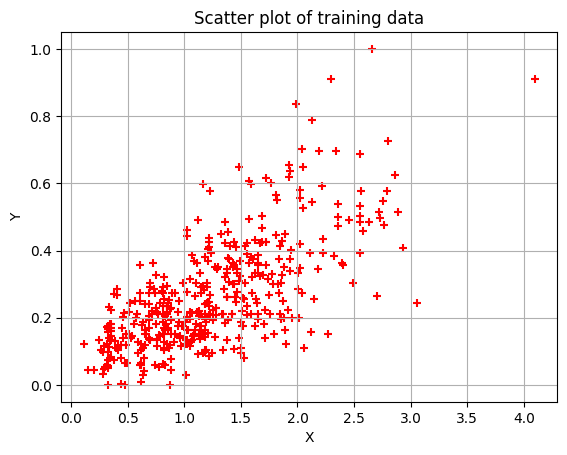

In [88]:
#Parameters
m = len(y_train)
n = len(x_train)
print('M =', m)
print('N =', n)
theta = np.zeros((13,m), dtype=np.float64)
#print(theta)

x_0 = np.ones((m,1))
#x_1 =


#Graph
X_train1 = x_train['area'] + x_train['bedrooms'] + x_train['bathrooms'] + x_train['stories'] + x_train['parking']

plt.scatter(X_train1, y_train, color='red',marker= '+')
#plt.scatter(x_train['bedrooms'], y_train, color='blue',marker= '+')
#plt.scatter(, y_train, color='green',marker= '+')
#plt.scatter(, y_train, color='yellow',marker= '+')
#plt.scatter(x_train['parking'], y_train, color='black',marker= '+')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of training data')

In [ ]:
#Prices for Theta 1 & 2
#price = compute_price(X_train1, y_train, theta)

In [81]:
#Gradient Descent
itr = 150;
a = 0.01;

#theta, price_estimate = gradient_descent(X_train1, y_train, theta, a, itr)
#print('Final value of Theta =', theta)
#print('Price estimate  =', price_estimate)


In [89]:
#Training and Validation Losses for 1A
x_train_1A = np.c_[np.ones((len(x_train), 1)), x_train]
x_val_1A = np.c_[np.ones((len(x_val), 1)), x_val]

train_losses_1A = []
val_losses_1A = []

for iteration in range(itr):
    gradients = 2/m * x_train_1A.T.dot(x_train_1A.dot(theta) - y_train)
    theta -= a * gradients

    train_loss = (1/m) * np.sum(np.square(x_train_1A.dot(theta) - y_train))
    val_loss = (1/len(x_val)) * np.sum(np.square(x_val.dot(theta) - y_val))

    train_losses_1A.append(train_loss)
    val_losses_1A.append(val_loss)

TypeError: ignored